In [1]:
!pip install text2emotion
!pip install raceplotly

     |████████████████████████████████| 57 kB 2.3 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Wall Street Bets 

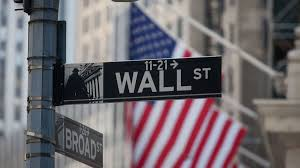

r/wallstreetbets, also known as WallStreetBets or WSB, is a subreddit where participants discuss stock and option trading. It has become notable for its profane nature, aggressive trading strategies, and role in the GameStop short squeeze that caused losses on short positions in U.S. firms topping US$70 billion in a few days in early 2021. The subreddit is famous for its colorful lingo and terms

# Importing the required packages

![](https://media1.tenor.com/images/047e6fd4e7169886e992a8899e62b90b/tenor.gif?itemid=12547153)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
import matplotlib.pyplot as plt
from raceplotly.plots import barplot

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing the data

In [3]:
data=pd.read_csv('../input/reddit-wallstreetsbets-posts/reddit_wsb.csv')

In [4]:
data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


# What is the distribution of title length in the data??

In [5]:
# What is the average length of the title
data['len']=data['title'].apply(lambda x : len(x.split(' ')))
px.histogram(data['len'],template='plotly_dark')

Most of the posts are of length that lies between 0-20 . Why is it like that , well title's are kept short to just give you of a gist of what lies in the body so it doesn't need to be too long :)

In [6]:
# Adding the emotions to the data and Date features to the data
# Use this code if you wanna make the sentiments from scratch
# t=[]
# count=0
# for i in data['title'].values:
#     count+=1
#     print(count*100/len(data))
#     clear_output(wait=True)
#     t.append(te.get_emotion(i))
# t=np.array(t)

In [7]:
t=np.load('../input/t-sentiments/another one.npy', allow_pickle=True)
data['overall text']=data.title+" "+data.body.astype("str")
data['Happy']=[dict(i)['Happy'] for i in t]
data['Angry']=[dict(i)['Angry'] for i in t]
data['Surprise']=[dict(i)['Surprise'] for i in t]
data['Sad']=[dict(i)['Sad'] for i in t]
data['Fear']=[dict(i)['Fear'] for i in t]
dominant=[]
for i in t:
    p=dict(i)
    Keymax = max(p, key=p.get)
    dominant.append(Keymax)
data['dominant emotion']=dominant
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
data['timestamp']=pd.to_datetime(data['timestamp'])
data['date']=data['timestamp'].dt.day
data['weekday']=data['timestamp'].dt.weekday
data['weekday']=data['weekday'].apply(lambda x: day_name[x])
data['hour']=data['timestamp'].dt.hour

# Post Distribution In Reddit About Volatile Week In Wall Street 

![](https://media1.tenor.com/images/dc7ef329c04f90b251a605e15a714399/tenor.gif?itemid=4224001)

In [8]:
px.histogram(data,x='weekday',color='weekday',template='plotly_dark')

## What happened on Friday ( 29-01-2021 ) ??
![](https://assets2.rappler.com/FC6E0FD23DBE4D369079E8659C5CDD1F/img/9BDDE9F098B04525A74C4C262C4FD9AB/1601083100-afp-20200703-stock-market-546.jpg)

On the final day of a volatile week of short-squeezing frenzy, the Dow Jones Industrial Average was set to drop about 150 points at Friday’s open, with Dow stock Johnson & Johnson falling after the U.S. drug giant released data about its one-dose coronavirus vaccine. The shot was 72% effective in the U.S., but less so in other regions. Wall Street’s volatility came amid the Reddit-fueled trading around GameStop and other highly shorted stocks.

The Dow on Thursday recovered nearly half of Wednesday’s 633-point decline, the worst one-session drop since late October. Ahead of Friday’s trading, the Dow was nearly 2% away from its closing record high earlier this month. Three Dow stocks — Caterpillar, Honeywell and Chevron — reported quarterly earnings before-the-bell, along with drugmaker Eli Lilly.

Source : https://www.cnbc.com/2021/01/29/5-things-to-know-before-the-stock-market-opens-january-29-2021.html

# People's Reaction Over Time From Friday To Wednesday

![](https://i.pinimg.com/originals/bb/4e/1a/bb4e1a95d39b5d28f1541b0575524ec5.gif)

In [9]:
df=pd.DataFrame()
df['Emotion']=data['dominant emotion']
df['Day']=data['weekday']
df['Count']=[1]*len(df)
grouped_data=df.groupby(['Day','Emotion']).sum()
ind=np.array(list(grouped_data.index))
df2=pd.DataFrame()
df2['Day']=ind[:,0]
df2['Emotion']=ind[:,1]
df2['Count']=grouped_data.values
my_raceplot = barplot(df2,
                      item_column='Emotion',
                      value_column='Count',
                      time_column='Day')

my_raceplot.plot(title = 'Emotion in the sub reddit section',
                 item_label = 'Emotions',
                 value_label = 'Count (Total Count On That Day)',
                 frame_duration = 800)

# What was the reaction of people on Friday 29-01-2021 as the time increased ??

In [10]:
df=pd.DataFrame()
dn=data[data['weekday']=='Friday']
df['Emotion']=dn['dominant emotion']
df['Hour']=dn['hour']
df['Count']=[1]*len(df)
grouped_data=df.groupby(['Hour','Emotion']).sum()
ind=np.array(list(grouped_data.index))
df2=pd.DataFrame()
df2['Hour']=ind[:,0]
df2['Emotion']=ind[:,1]
df2['Count']=grouped_data.values
df2['Hour']=df2['Hour'].apply(lambda x : int(x))
df2.sort_values('Hour',inplace=True)
my_raceplot = barplot(df2,
                      item_column='Emotion',
                      value_column='Count',
                      time_column='Hour')

my_raceplot.plot(title = 'Emotion in the sub reddit section on Friday as the day continued',
                 item_label = 'Emotions',
                 value_label = 'Count (Total Count On That Day)',
                 frame_duration = 800)

As we can clearly see that a sudden peak was seen during the 1st hour of the day but it decreased as the time passed by

# 10 Most Common Domains Shared In The URL Column

![](https://media2.giphy.com/media/l3giLj8coa2HVnzgeF/200w.webp?cid=ecf05e47xnbsoifwwqtd4prnmffux4dn9sqchxcl2q96i0au&rid=200w.webp)

In [11]:
text=[]
for i in data['url']:
    t=i
    if '/' in t:
        t=t.split('/')[2]
    if 'www.' in t:
        t=t.split('www.')[1]
    if '.com' in t:
        t=t.split('.com')[0]
    text.append(t)
text=pd.DataFrame(columns=['text'],data=text)
s=' '
for i in text['text'].values:
    s+=' '+i
text=text['text'].value_counts()
px.bar(x=text.index[:10],y=text.values[:10],color=text.index[:10],template='plotly_dark',labels={'x':'Domains','y':'Count'})

# Relationship between Emotion and Number of comments

In [12]:
rel=data.groupby('dominant emotion').sum()
px.bar(x=rel.index,y=rel['comms_num'].values,color=rel.index,template='plotly_dark',labels={'x':'Emotions','y':'Number of comments'})

## We can observe from this that most of the people comment on the posts which shares happiness of are looking as a good sign , followed by fear and surprise :)

# Relation between emotion and score 

In [13]:
rel=data.groupby('dominant emotion').mean()
px.bar(x=rel.index,y=rel['score'].values,color=rel.index,template='plotly_dark',labels={'x':'Emotions','y':'Mean of score'})

## Well the score is nearly same for every emotion but an angry comment is the only one which seems to cross 1000 as it's mean of score which shows that angry comments seems to get more score as compared to others

# Word Cloud For Different Emotions

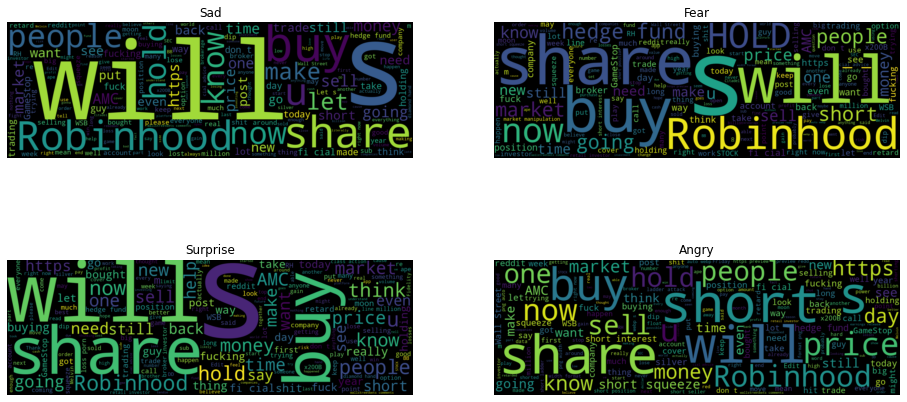

In [14]:
# Wordplot for being angry,sad,emotional
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry']:
    dd=data[data['dominant emotion']==i]
    text=" ".join(dd['overall text'])
    text=text.replace("stock",' ')
    text=text.replace("GME"," ")
    text=text.replace("nan",' ')
    wordcloud = WordCloud(width=1500, height=500).generate(text)

    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0
   




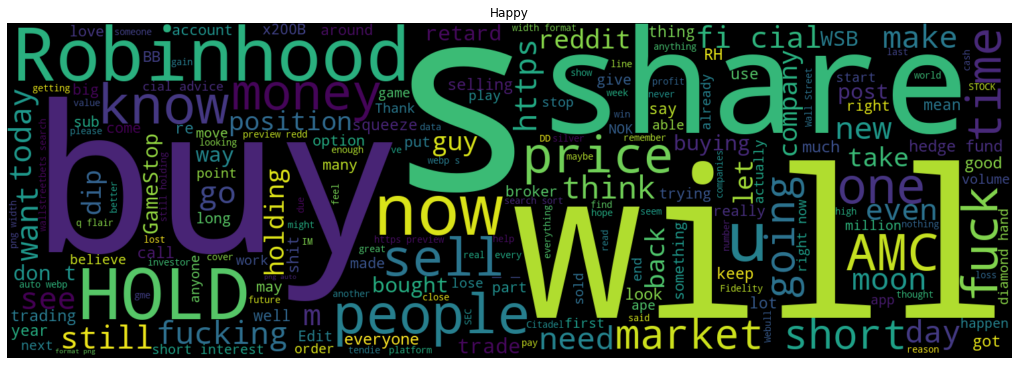

In [15]:

dd=data[data['dominant emotion']=='Happy']
text=" ".join(dd['overall text'])
text=text.replace("stock",' ')
text=text.replace("GME"," ")
text=text.replace("nan",' ')
wordcloud = WordCloud(width=1500, height=500).generate(text)
plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear');
plt.title('Happy') ;
plt.axis("off") ;


# You can clearly see the words that are highlighted for specific sentiments

# Hope you liked everything :)

![](https://1.bp.blogspot.com/-P5lBi5oH1NY/XyIhe8sEIYI/AAAAAABHgB0/DRcxH9Ybeb0KXK7YSOxbImycBkkEaDSAwCLcBGAsYHQ/s340/AS0007060_00.gif)